In [9]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)

In [3]:
def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [4]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

In [5]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

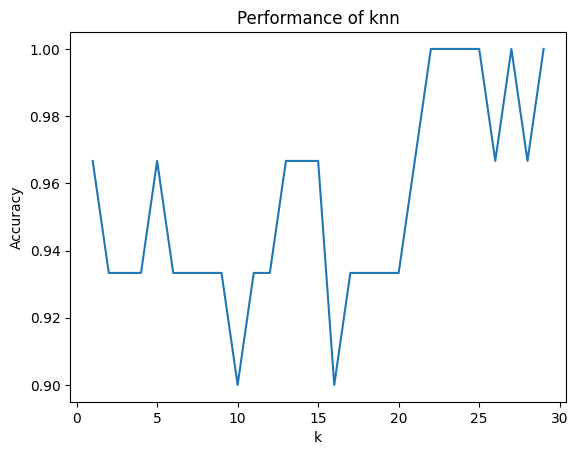

In [10]:
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()


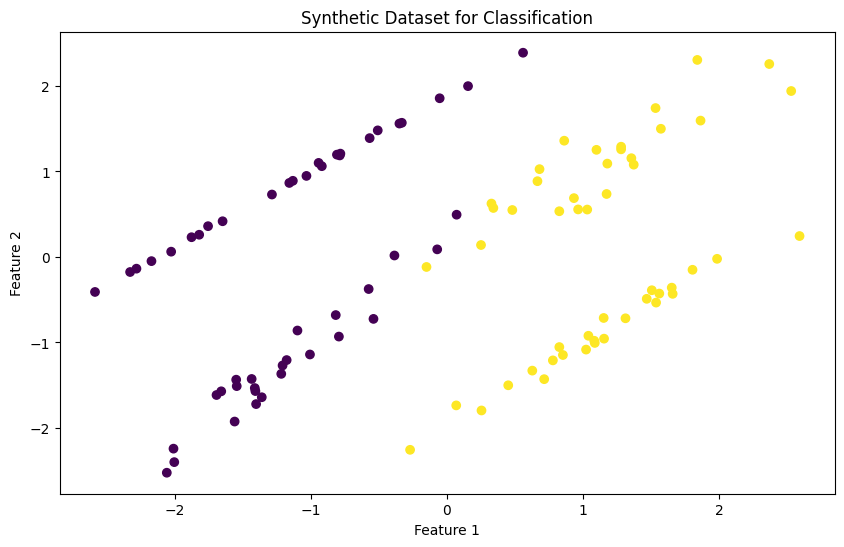

Accuracy: 0.95


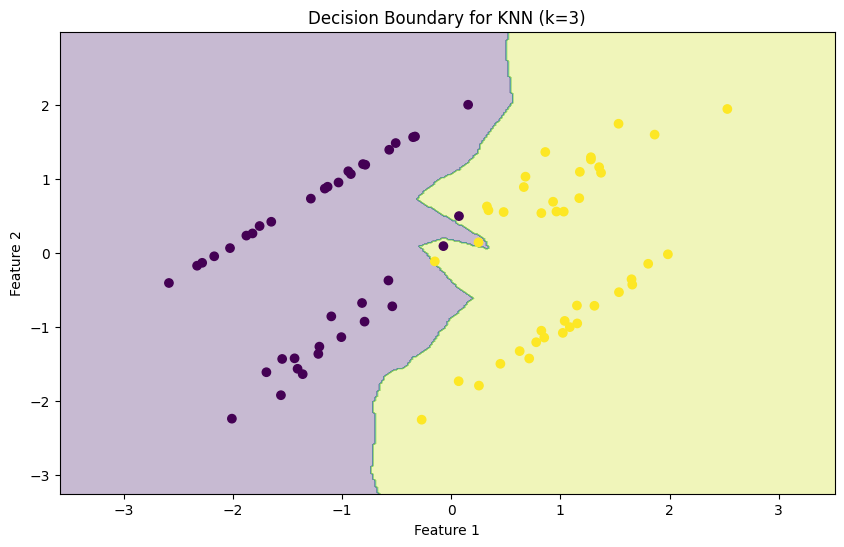

In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generating a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Visualizing the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Dataset for Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the KNN algorithm from scratch
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        predictions = []
        for sample in X_test:
            distances = []
            for train_sample, label in zip(self.X_train, self.y_train):
                # Calculating Euclidean distance
                distance = np.sqrt(np.sum((sample - train_sample)**2))
                distances.append((distance, label))
            
            # Sorting distances and selecting top k nearest neighbors
            distances.sort()
            top_k_neighbors = distances[:self.k]
            
            # Counting votes for each class
            votes = {}
            for neighbor in top_k_neighbors:
                votes[neighbor[1]] = votes.get(neighbor[1], 0) + 1
            
            # Predicting the class with the highest vote
            predicted_label = max(votes, key=votes.get)
            predictions.append(predicted_label)
        
        return np.array(predictions)

# Instantiate the KNN model
knn = KNN(k=3)
knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Visualizing the decision boundary
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

# Visualizing the decision boundary for KNN model
plt.figure(figsize=(10, 6))
plot_decision_boundary(knn, X_train, y_train)
plt.title('Decision Boundary for KNN (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
